# Integrating Flirt Prediction with whatsapp Chat Analyser
## Rubhini.S

## 1.Data Preprocessing

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load the Dataset
data = pd.read_csv('FlirtData.csv')  # Replace with your actual file path

In [3]:
data

,Unnamed: 0,Date,Time,Name,Chat,Label
0,0,2024-04-18,12:45 PM,Rubhini,<Media omitted>,Not Flirty
1,1,2024-04-18,12:46 PM,Rubhini,This msg I'm receiving while trying to login,Not Flirty
2,2,2024-04-18,12:50 PM,Yogana,Pls share ramisha mam number mam,Not Flirty
3,3,2024-04-18,12:50 PM,Rubhini,I wish I was your mirror,Flirty
4,4,2024-04-20,05:42 PM,Rubhini,<Media omitted>,Not Flirty
...,...,...,...,...,...,...
196,196,2024-05-14,12:30 AM,Rubhini,"What do you find attractive in, let's say, me",Flirty
197,197,2024-05-14,11:45 PM,Rubhini,"Is there an airport close by, or is it just my...",Flirty
198,198,2024-05-15,11:45 PM,Rubhini,I have crossed oceans of time to find you,Flirty
199,199,2024-05-15,11:48 PM,Rubhini,You are everything I never knew I always wanted,Flirty


In [4]:
#Remove the unwanted column
#Replace the unwanted Symbols
#Change thye datatype if needed
data.drop("Unnamed: 0",axis=1,inplace=True)
data['Chat'] = data['Chat'].str.replace('<', '', regex=False).str.replace('>', '', regex=False)
data['Date']=pd.to_datetime(data['Date'], dayfirst=False)

In [5]:
#About the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    201 non-null    datetime64[ns]
 1   Time    201 non-null    object        
 2   Name    201 non-null    object        
 3   Chat    201 non-null    object        
 4   Label   201 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 8.0+ KB


In [6]:
#Copy of the dataframe was taken to perform flirt_prediction
senti_ds=data.copy()

In [7]:
# Removing the extra spaces in text
senti_ds['Chat'] = senti_ds['Chat'].str.strip()
senti_ds.drop(senti_ds[senti_ds['Chat'].str.contains(r'<\s*Media\s+omitted\s*>', na=False)].index, inplace=True)
senti_ds.drop(senti_ds[senti_ds['Chat'].str.contains('Media omitted', na=False)].index, inplace=True)
senti_ds.reset_index(drop=True, inplace=True)

In [8]:
senti_ds

,Date,Time,Name,Chat,Label
0,2024-04-18,12:46 PM,Rubhini,This msg I'm receiving while trying to login,Not Flirty
1,2024-04-18,12:50 PM,Yogana,Pls share ramisha mam number mam,Not Flirty
2,2024-04-18,12:50 PM,Rubhini,I wish I was your mirror,Flirty
3,2024-04-20,06:36 PM,Rubhini,Inside Downloaded resources some datasets are ...,Not Flirty
4,2024-04-20,06:36 PM,Rubhini,Were better together than peanut butter and c...,Flirty
...,...,...,...,...,...
126,2024-05-14,12:30 AM,Rubhini,"What do you find attractive in, let's say, me",Flirty
127,2024-05-14,11:45 PM,Rubhini,"Is there an airport close by, or is it just my...",Flirty
128,2024-05-15,11:45 PM,Rubhini,I have crossed oceans of time to find you,Flirty
129,2024-05-15,11:48 PM,Rubhini,You are everything I never knew I always wanted,Flirty


# 2. Flirt_Prediction

In [9]:
senti_ds['Label'].value_counts()

Label
Not Flirty    79
Flirty        52
Name: count, dtype: int64

In [10]:
# The dataset is imbalanced, upsampling the data
df_majority =senti_ds[(senti_ds['Label']=='Not Flirty')] 
df_minority = senti_ds[(senti_ds['Label']=='Flirty')] 
df_minority_upsampled = resample(df_minority, replace=True,n_samples=79 ,random_state=42)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled.reset_index(drop=True, inplace=True)

In [11]:
df_upsampled

,Date,Time,Name,Chat,Label
0,2024-05-08,09:24 PM,Rubhini,"You look so pretty baby""",Flirty
1,2024-05-16,01:48 PM,Rubhini,Out of sight but never out of mind,Flirty
2,2024-05-07,04:16 PM,Rubhini,I'm delighted to announce that my latest project,Flirty
3,2024-05-16,03:16 PM,Rubhini,Do you believe in love at first sight,Flirty
4,2024-05-09,11:24 PM,Rubhini,How do you like to be comforted when youre sa...,Flirty
...,...,...,...,...,...
153,2024-05-11,10:45 AM,Yogana,What was the last good book you read,Not Flirty
154,2024-05-11,11:45 AM,Yogana,What is the most rewarding part of your career?,Not Flirty
155,2024-05-11,03:45 PM,Yogana,Do you have any food allergies or intolerances,Not Flirty
156,2024-05-13,11:45 PM,Yogana,I really miss just walking along the beach and...,Not Flirty


In [12]:
#The dataset is balanced
df_upsampled['Label'].value_counts()

Label
Flirty        79
Not Flirty    79
Name: count, dtype: int64

# 2. a. Sentimental score is analysed to predict the flirty messages accurately

In [13]:
#import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
#performing sentimental analysis
sid = SentimentIntensityAnalyzer()
df_upsampled['Sentiment_Score'] = df_upsampled['Chat'].apply(lambda x: sid.polarity_scores(x)['compound'])

# 2. b. Preprocessing the text to numbers using TfIdf Vectorizer

In [15]:
Tfidf_vector=TfidfVectorizer(stop_words='english',max_features=1000)

# 2. c. Separating the independent and dependent variables

In [16]:
X = np.hstack([Tfidf_vector.fit_transform(df_upsampled['Chat']).toarray(),df_upsampled[['Sentiment_Score']].values])
y =df_upsampled['Label']

In [17]:
y

0          Flirty
1          Flirty
2          Flirty
3          Flirty
4          Flirty
          ...    
153    Not Flirty
154    Not Flirty
155    Not Flirty
156    Not Flirty
157    Not Flirty
Name: Label, Length: 158, dtype: object

# 2. d. Splitting into train and test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. e. Model Creation under Classification algorithms

In [19]:
def cm_prediction(classifier,X_test,y_test):
    y_pred=classifier.predict(X_test)
    y_test = y_test.astype(str)
    y_pred = y_pred.astype(str)
    #Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred,labels=['Flirty','Not Flirty'])
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    Accuracy=accuracy_score(y_test,y_pred)
    report=classification_report(y_test,y_pred,target_names=['Not Flirty', 'Flirty'])
    return classifier,Accuracy,report,X_test,y_test,cm

def logistic(X_train,y_train,X_test,y_test):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

def knn(X_train,y_train,X_test,y_test):
    # Fitting K-NN to the Training set
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

def passAgress(X_train,y_train,X_test,y_test):
    from sklearn.linear_model import PassiveAggressiveClassifier
    classifier = PassiveAggressiveClassifier()
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
    return  classifier,Accuracy,report,X_test,y_test,cm  

def selectbest_Classification(acclog,accknn,accpa):
    dataframe=pd.DataFrame(columns=['Logistic','KNN','PassiveAggressive'])
    length = min(len(acclog), len(accknn), len(accpa))
    for i in range(length):
        dataframe.loc[i] = [acclog[i],accknn[i],accpa[i]]
    return dataframe

In [20]:
# List created to store the accuracy value
acclog=[]
accknn=[]
accpa=[]

In [21]:
#Function call
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test,y_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test,y_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=passAgress(X_train,y_train,X_test,y_test)  
accpa.append(Accuracy)
        
result=selectbest_Classification(acclog,accknn,accpa)

In [22]:
# Accuracy value for all classification algorithms
result

,Logistic,KNN,PassiveAggressive
0,0.90625,0.8125,0.96875


# 2. f. Model with higher accuracy is finalized 

In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Flirty','Not Flirty'])

accuracy:   0.969


In [24]:
# 2. g. Save the best model

In [25]:
import pickle
filename="final_PassAgress.sav"
pickle.dump(classifier,open(filename,'wb'))
loaded_model=pickle.load(open("final_PassAgress.sav",'rb'))
res=loaded_model.predict(X)
df_upsampled['Predicted_Label'] = res
df_upsampled

,Date,Time,Name,Chat,Label,Sentiment_Score,Predicted_Label
0,2024-05-08,09:24 PM,Rubhini,"You look so pretty baby""",Flirty,0.6269,Flirty
1,2024-05-16,01:48 PM,Rubhini,Out of sight but never out of mind,Flirty,0.0000,Flirty
2,2024-05-07,04:16 PM,Rubhini,I'm delighted to announce that my latest project,Flirty,0.5106,Flirty
3,2024-05-16,03:16 PM,Rubhini,Do you believe in love at first sight,Flirty,0.6369,Flirty
4,2024-05-09,11:24 PM,Rubhini,How do you like to be comforted when youre sa...,Flirty,-0.1027,Flirty
...,...,...,...,...,...,...,...
153,2024-05-11,10:45 AM,Yogana,What was the last good book you read,Not Flirty,0.4404,Not Flirty
154,2024-05-11,11:45 AM,Yogana,What is the most rewarding part of your career?,Not Flirty,0.5709,Not Flirty
155,2024-05-11,03:45 PM,Yogana,Do you have any food allergies or intolerances,Not Flirty,0.0000,Not Flirty
156,2024-05-13,11:45 PM,Yogana,I really miss just walking along the beach and...,Not Flirty,-0.2247,Not Flirty


# 3. Flirt, Time and Media encounter function

In [26]:
def flirtation_status(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Generate the result dataframe
    result = df.groupby('Name')['Predicted_Label'].apply(lambda x: 'Yes' if 'Flirty' in x.values else 'No').reset_index()
    result.columns = ['Name', 'Status']
    # Use join to create the formatted string in one step
    flirted_by = '\n'.join([f"Flirted by {row['Name']}: {row['Status']}" for _, row in result.iterrows()])
    print(flirted_by)
    # Filter and group by 'Name' to count the occurrences of 'Flirty' predictions
    flirt_count = df[df['Predicted_Label'] == 'Flirty'].groupby('Name').size().reset_index(name='Flirt_Count')
    # Plotting
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Name', y='Flirt_Count', data=flirt_count,hue='Name',palette='viridis')
    plt.title('Total Number of Flirted Messages by Each Person', fontsize=16)
    plt.xlabel('Name', fontsize=14)
    plt.ylabel('Number of Flirted Messages', fontsize=14)
    plt.show()

In [27]:
def time_encounters(data):
    count_date = data['Date'].value_counts().reset_index()
    count_date.columns = ['Date', 'count']
    most_active_date = count_date.iloc[0]['Date']
    most_active_date = str(most_active_date)[:10]
    
    # Most Active Time
    count_time = data['Time'].value_counts().reset_index()
    count_time.columns = ['Time', 'count']
    most_active_time = count_time.iloc[0]['Time']
    
    # Average Messages per Day
    msg_count = data.groupby('Date')['Chat'].count().reset_index()
    avg_msg_count = msg_count['Chat'].mean()
    
    print("Most Active Date:", most_active_date)
    print("Most Active Time:", most_active_time)
    print(f"Average Messages per Day: {avg_msg_count:.0f}")

def media_encounters(data):
    # Media Count
    media_shared = data[data['Chat'].str.contains('Media omitted')]
    num_media_shared = len(media_shared)
    
    # Deleted Message Count
    msg_deleted = data[data['Chat'].str.contains('You deleted this message')]
    num_msg_deleted = len(msg_deleted)
    
    # Missed Voice Call Count
    missed_call = data[data['Chat'].str.contains('Missed voice call')]
    num_miss_voice = len(missed_call)
    
    # Missed Video Call Count
    missed_video_call = data[data['Chat'].str.contains('Missed video call')]
    num_miss_video = len(missed_video_call)
    
    print("Media Count:", num_media_shared)
    print("Deleted Message Count:", num_msg_deleted)
    print("Missed Voice Call Count:", num_miss_voice)
    print("Missed Video Call Count:", num_miss_video)

def talk_encounters(data):
    # Talkative and Less Talkative Persons
    talk_count = data.groupby('Name')['Chat'].count().reset_index()
    talk_count.columns = ['Name', 'Chat_Count']
    max_count = talk_count['Chat_Count'].max()
    min_count = talk_count['Chat_Count'].min()
    
    # Retrieve the name with the maximum chat count
    most_talkative = talk_count[talk_count['Chat_Count'] == max_count]['Name'].values[0]
    less_talkative = talk_count[talk_count['Chat_Count'] == min_count]['Name'].values[0]
    
    print("Most Talkative Person:", most_talkative)
    print("Least Talkative Person:", less_talkative)

In [28]:
# Calling the defined functions
def analyze_chat_data(data):
    print("---- Time Encounters ----")
    time_encounters(data)
    
    print("\n---- Media Encounters ----")
    media_encounters(data)
    
    print("\n---- Talk Encounters ----")
    talk_encounters(data)

---- Time Encounters ----
Most Active Date: 2024-05-16
Most Active Time: 09:24 PM
Average Messages per Day: 10

---- Media Encounters ----
Media Count: 70
Deleted Message Count: 7
Missed Voice Call Count: 0
Missed Video Call Count: 0

---- Talk Encounters ----
Most Talkative Person: Rubhini
Least Talkative Person: Yogana
Flirted by Rubhini: Yes
Flirted by Yogana: Yes


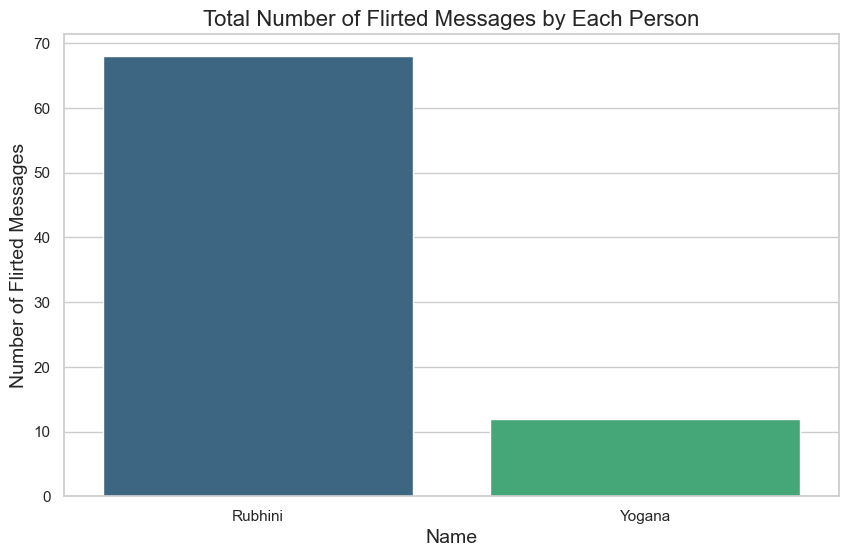

In [29]:
analyze_chat_data(data)
flirt=flirtation_status(df_upsampled)